## Cloning WebAppBuilder application with custom Widget

In [1]:
from arcgis.gis import GIS, Item

In [2]:
source = GIS(profile='esoapp_unetwork')
target = GIS(profile='esoapp2_unetwork')

### Get WAB item

<Item title:"WABWithCustomWidget" type:Web Mapping Application owner:unetwork>
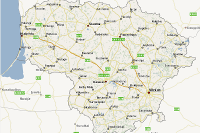

In [3]:
wab_item_id = '83aab192652c4591a533b0bed4c39a8a'
custom_wab_item = Item(source, wab_item_id)
custom_wab_item

In [4]:
folder_name = 'DevEU24'
folder = next((f for f in target.users.me.folders if f['title'] == folder_name), None)
if not folder:
    folder = target.content.create_folder(folder=folder_name)
folder

{'username': 'unetwork',
 'id': '649b7ebd7ae142c5bc8d26c7aa9f3c88',
 'title': 'DevEU24',
 'created': 1727676075935}

### Let's try to clone WAB...

In [5]:
try:
    cloned_items = target.content.clone_items(items=[custom_wab_item],
                                             use_org_basemap=True,
                                             search_existing_items=True,
                                             folder=folder['title'])
except Exception as e:
    print("Failed to clone.")
    print(str(e))

In [6]:
cloned_items

[<Item title:"WABWithCustomWidget" type:Web Mapping Application owner:unetwork>]

<Item title:"WABWithCustomWidget" type:Web Mapping Application owner:unetwork>
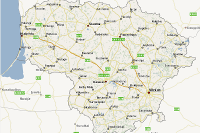

In [7]:
cloned_wab_app = cloned_items[0]
cloned_wab_app

### Test the App. Where is my widget???

In [8]:
menu_panel = cloned_wab_app.get_data().get('widgetPool')
menu_panel

{'panel': {'uri': 'themes/FoldableTheme/panels/FoldablePanel/Panel',
  'position': {'top': 5,
   'right': 5,
   'bottom': 5,
   'zIndex': 5,
   'relativeTo': 'map'}},
 'widgets': [{'uri': 'widgets/Legend/Widget',
   'version': '2.16',
   'id': 'widgets_Legend_Widget_18',
   'name': 'Legend',
   'index': 2},
  {'uri': 'widgets/LayerList/Widget',
   'version': '2.16',
   'id': 'widgets_LayerList_Widget_19',
   'name': 'LayerList',
   'index': 3},
  {'name': 'GoToXY',
   'label': 'GoToXY',
   'version': '2.16',
   'itemId': '0835db1776df4d5b875287ff0648e98e',
   'config': {'xMinLks': 264834,
    'xMaxLks': 731560,
    'yMinLks': 5915815,
    'yMaxLks': 6311101,
    'xMinWgs': 53.329,
    'xMaxWgs': 56.874,
    'yMinWgs': 20.142,
    'yMaxWgs': 27.799},
   'index': 5,
   'id': '0835db1776df4d5b875287ff0648e98e_20'}],
 'groups': []}

In [9]:
widgets = menu_panel['widgets']
custom_widget = next(w for w in widgets if w['name'] == 'GoToXY')
custom_widget

{'name': 'GoToXY',
 'label': 'GoToXY',
 'version': '2.16',
 'itemId': '0835db1776df4d5b875287ff0648e98e',
 'config': {'xMinLks': 264834,
  'xMaxLks': 731560,
  'yMinLks': 5915815,
  'yMaxLks': 6311101,
  'xMinWgs': 53.329,
  'xMaxWgs': 56.874,
  'yMinWgs': 20.142,
  'yMaxWgs': 27.799},
 'index': 5,
 'id': '0835db1776df4d5b875287ff0648e98e_20'}

### Delete cloned application

In [10]:
status = target.content.can_delete(cloned_wab_app)
if status['success']:
    target.content.delete_items([cloned_wab_app])
    print (f'Apllication with ItemId:{cloned_wab_app.id} deleted')
else:
    print(status['reason'])

Apllication with ItemId:1e7059a095184b799a1debb2eb2bdb71 deleted


### Let's clone custom Widget separately

In [11]:
cust_widget_id = custom_widget['itemId']
custom_widget = Item(source, cust_widget_id)
custom_widget

<Item title:"GoToXY" type:AppBuilder Extension owner:utilitynet>

In [12]:
try:
    cloned_item = target.content.clone_items(items=[custom_widget],
                                             folder=folder['title'])
except Exception as e:
    print("Failed to clone.")
    print(str(e))

In [13]:
cloned_widget = cloned_item[0]
print (f'Newly cloned widget [{cloned_widget.title}] ItemId={cloned_widget.id}')

Newly cloned widget [GoToXY] ItemId=d50e59326c8049569c61bf9b505f372e


### Build item mapping and clone Application once again

In [14]:
item_mapping = {cust_widget_id : cloned_widget.id}
item_mapping

{'0835db1776df4d5b875287ff0648e98e': 'd50e59326c8049569c61bf9b505f372e'}

In [15]:
try:
    cloned_items = target.content.clone_items(items=[custom_wab_item],
                                             search_existing_items=True,
                                             item_mapping=item_mapping,
                                             folder=folder['title'])
except Exception as e:
    print("Failed to clone.")
    print(str(e))

In [16]:
cloned_items

[<Item title:"WABWithCustomWidget" type:Web Mapping Application owner:unetwork>]

<Item title:"WABWithCustomWidget" type:Web Mapping Application owner:unetwork>
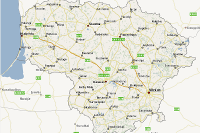

In [17]:
cloned_wab_app = cloned_items[0]
cloned_wab_app